# Credit Card Fraud Detection

### Problem Statement:
The objective of Credit Card Fraud Detection is to accurately identify fraudulent transactions from a large pool of credit card transactions by building a predictive model based on past transaction data. The aim is to detect all fraudulent transactions with minimum false alarms.

## Imports and Reading Dataset:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [6]:
#For warnings-

import warnings
warnings.filterwarnings('ignore')

In [7]:
#Reading Dataset-

df = pd.read_csv("C:/Users/DELL/Downloads/archive/creditcard.csv")

In [8]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## EDA:

In [9]:
#Checking Top 5 Reccords-

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
#Checking last 5 records-

df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
df.shape

(284807, 31)

In [12]:
list[df.columns]

list[Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')]

In [13]:
#Getting familiar with the structure of the dataset-

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [15]:
#To know more about the dataset with transpose – here T is for the transpose

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [16]:
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [17]:
#Skewness-

df.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

#### Skewness:
It is a measurement of the distortion of symmetrical distribution or asymmetry in a data set. Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve.

In [18]:
df.kurtosis()

Time       -1.293530
V1         32.486679
V2         95.773106
V3         26.619551
V4          2.635455
V5        206.904560
V6         42.642494
V7        405.607417
V8        220.586974
V9          3.731311
V10        31.988239
V11         1.633921
V12        20.241870
V13         0.195300
V14        23.879462
V15         0.284769
V16        10.419131
V17        94.799719
V18         2.578341
V19         1.724970
V20       271.016113
V21       207.287040
V22         2.832967
V23       440.088659
V24         0.618871
V25         4.290412
V26         0.919006
V27       244.989241
V28       933.397502
Amount    845.092646
Class     573.887843
dtype: float64

#### Kurtosis:
It is a measure of the tailedness of a distribution. Tailedness is how often outliers occur. Excess kurtosis is the tailedness of a distribution relative to a normal distribution. Distributions with medium kurtosis (medium tails) are mesokurtic. Distributions with low kurtosis (thin tails) are platykurtic.

In [19]:
#Checking Duplicates- 

df.isnull().head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

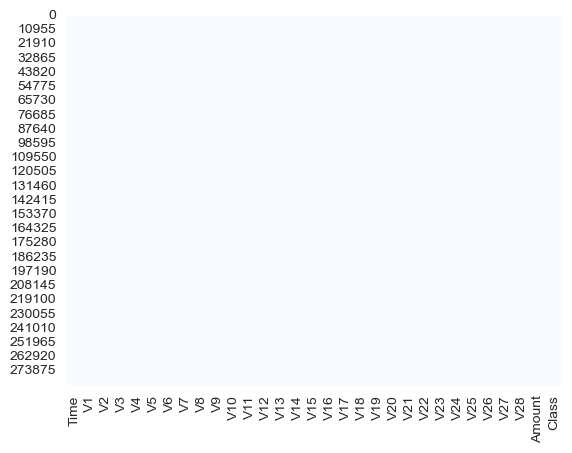

In [20]:
#Missing value heatmap-

sns.heatmap(df.isnull(),cbar=False,cmap='Blues')

#### Luckily we don't have any Missing Value

In [21]:
#Correlation-

df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


#### Correlation is the statistical summary of the relationship between two sets of variables. It is a core part of data exploratory analysis, and is a critical aspect of numerous advanced machine learning techniques.

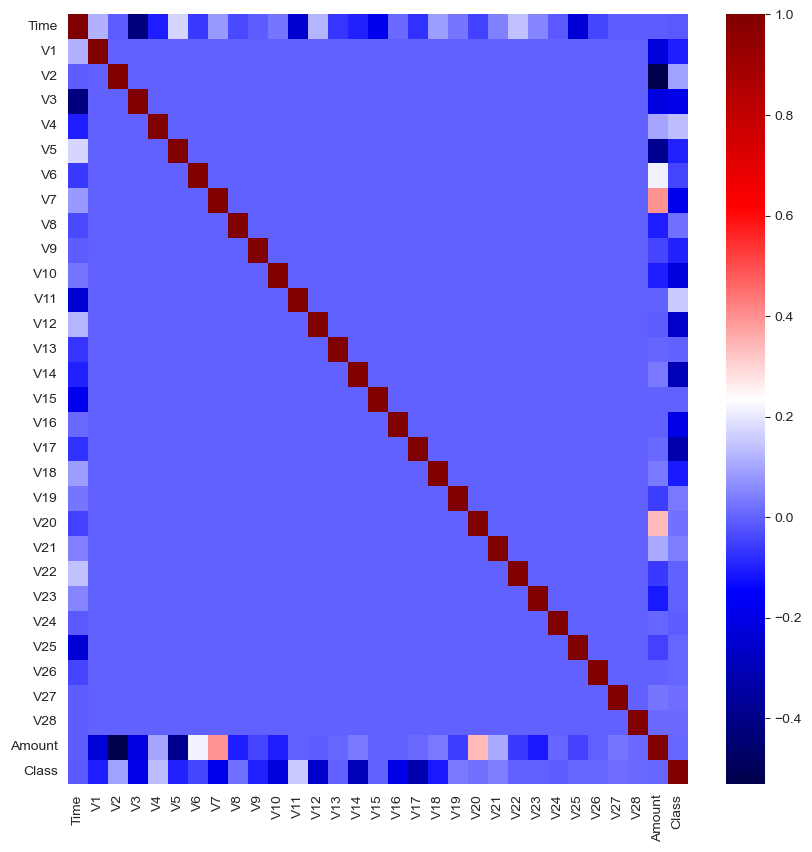

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), cmap="seismic")
plt.show()

Highest correlations come from:
- Time & V3 (-0.42)
- Amount & V2 (-0.53)
- Amount & V4 (0.4)

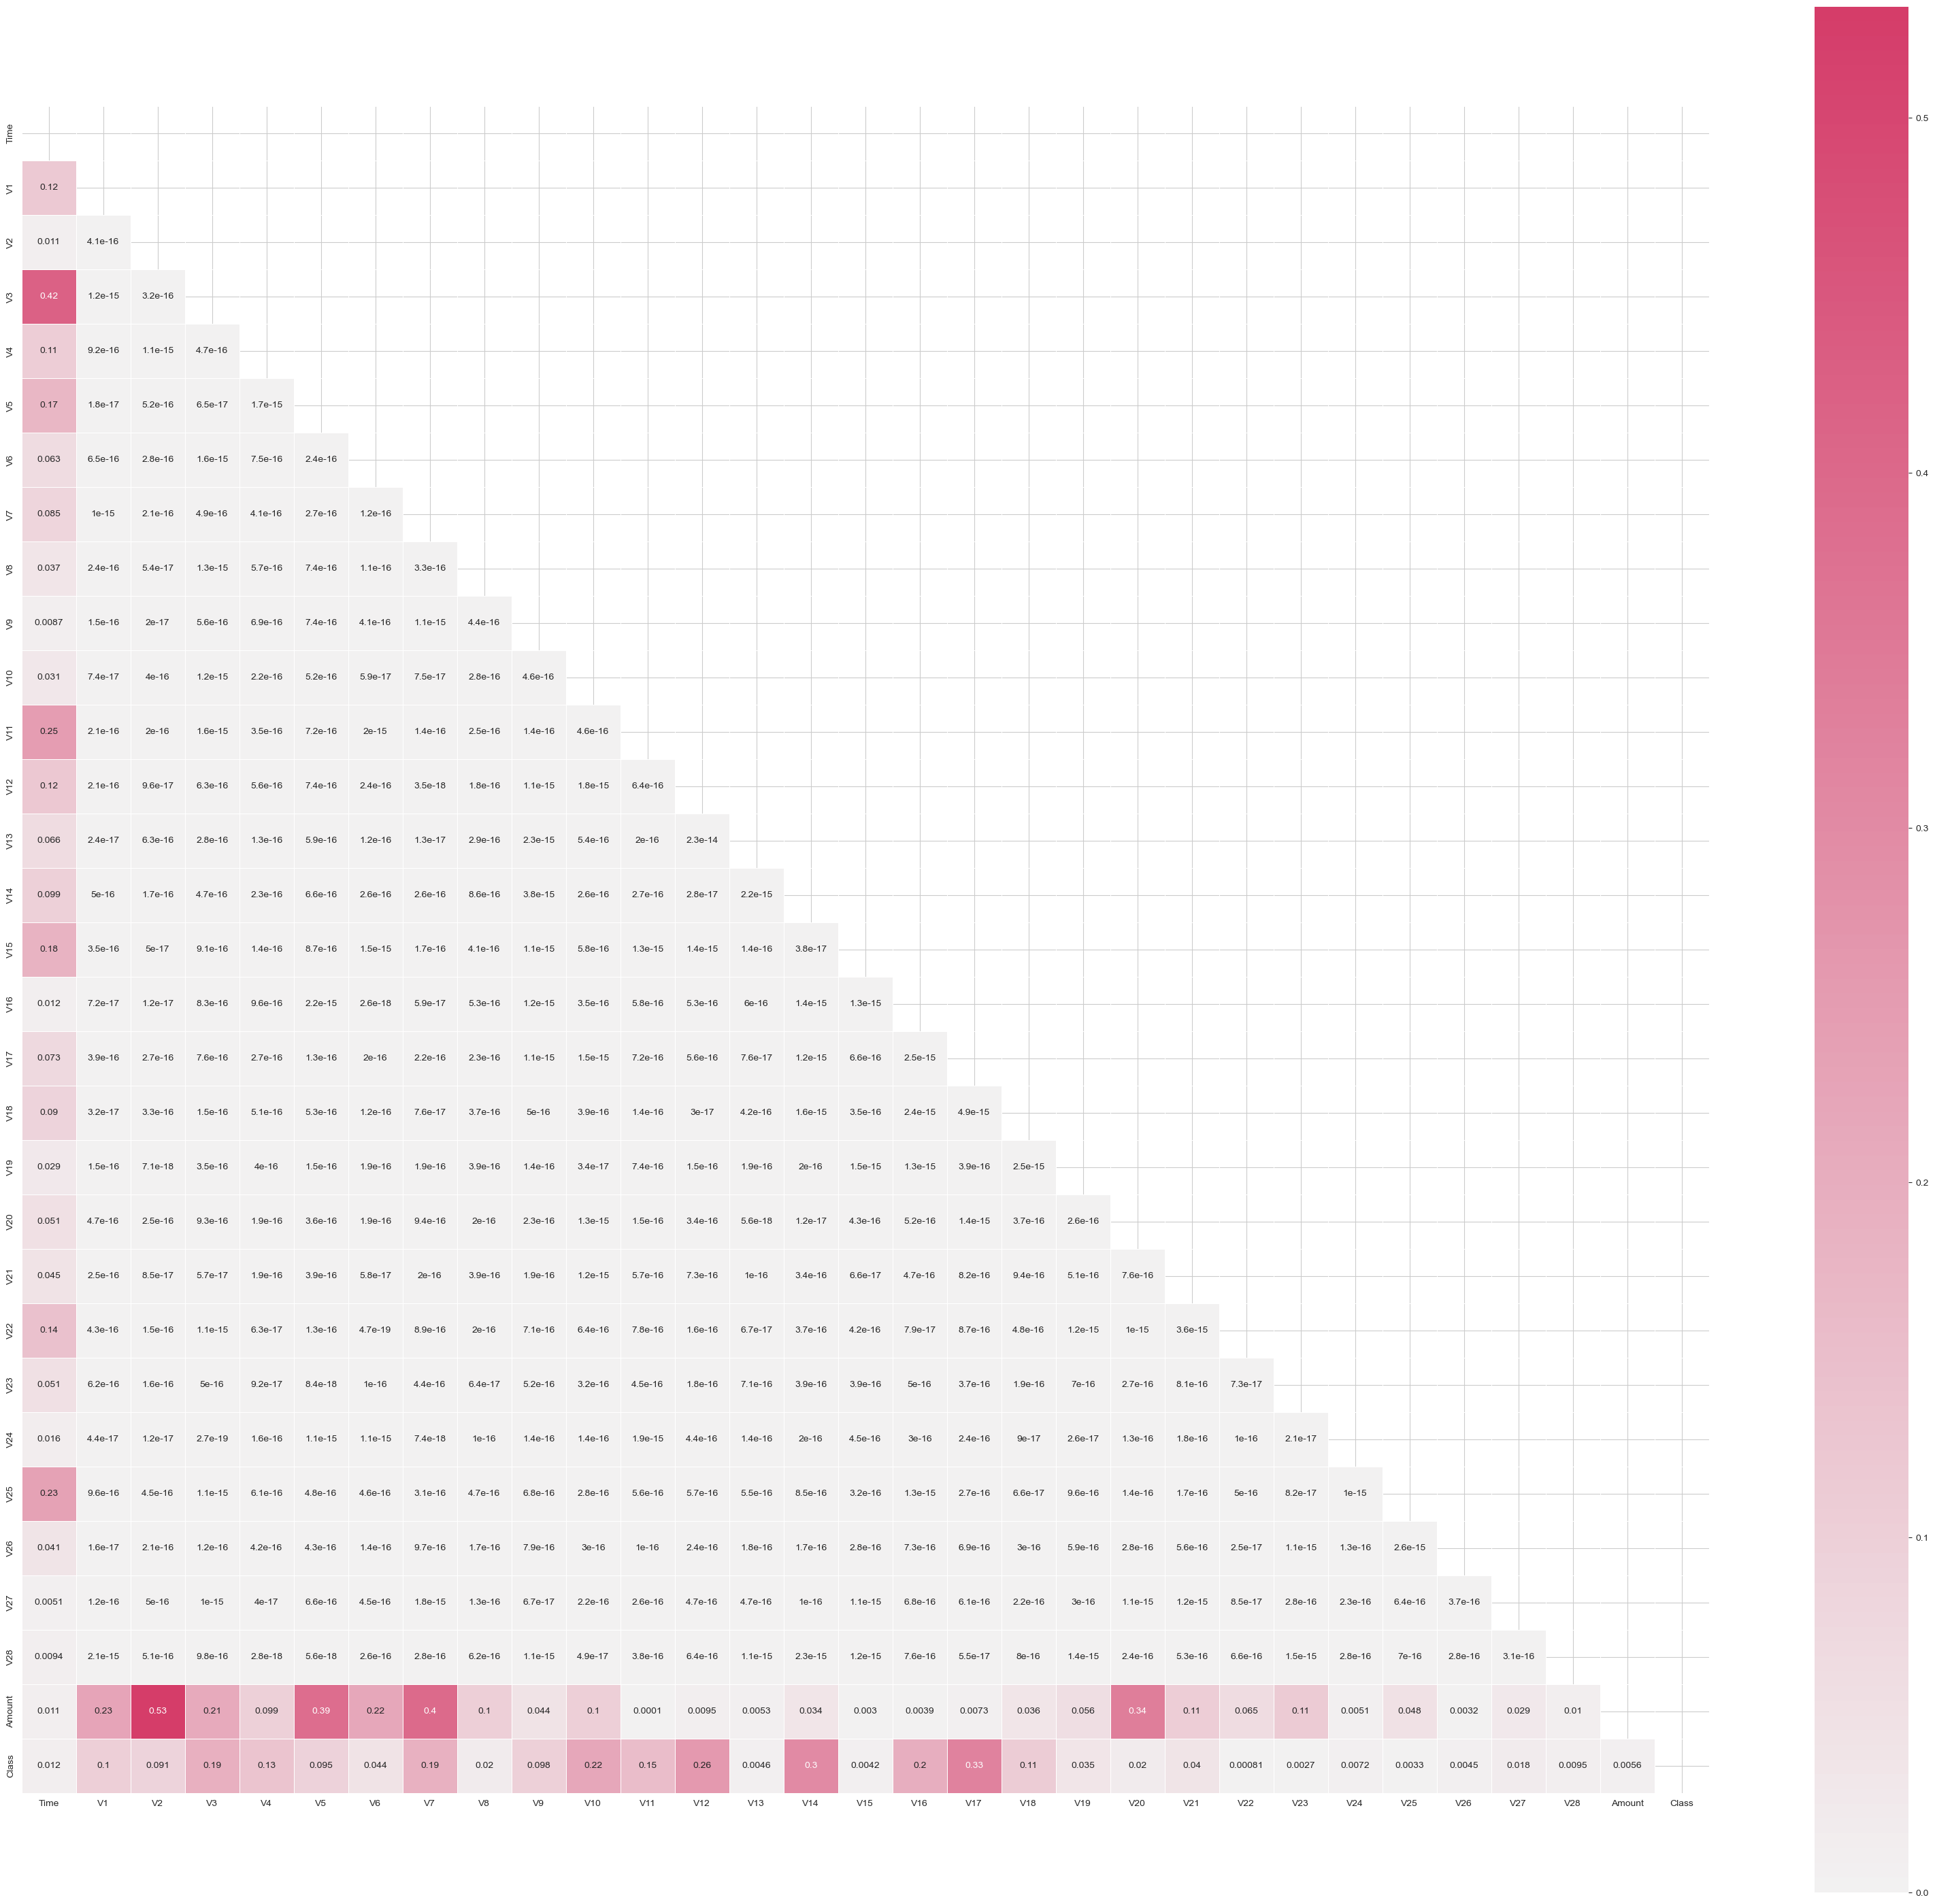

In [23]:
#Correlation Detection-

correlation_mat = df.corr().abs()

mask = np.triu(np.ones_like(correlation_mat, dtype = np.bool_))
f, ax = plt.subplots(figsize = (40, 40))
cmap = sns.diverging_palette(255, 0, as_cmap = True)
sns.heatmap(correlation_mat, mask = mask, cmap = cmap,\
vmax = None,center = 0, square = True, annot = True, \
linewidths = .5, cbar_kws = {"shrink": 0.9})

#Print out almost perfect correlated features-

upper_triangle = correlation_mat.where(np.triu(np.ones\
(correlation_mat.shape),k = 1).astype(np.bool_))

While these correlations are high, I don't expect it to run the risk of multicollinearity.

The correlation matrix shows also that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

### The only non-transformed variables to work with are:
1. Time
2. Amount
3. Class (1: fraud, 0: not_fraud)

Text(0, 0.5, 'Frequency')

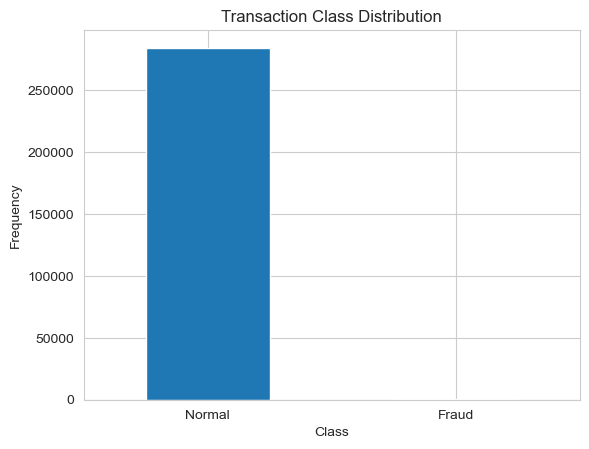

In [25]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [27]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

### 2.1 Determine the number of fraud and valid transactions in the entire dataset:

In [28]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


In [29]:
#How different are the amount of money used in different transaction classes ?

pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [30]:
#Do fraudulent transactions occur more often during certain time frame ?

pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.000000,284315.000000
mean,80746.806911,94838.202258
std,47835.365138,47484.015786
min,406.000000,0.000000
25%,41241.500000,54230.000000
50%,75568.500000,84711.000000
75%,128483.000000,139333.000000
max,170348.000000,172792.000000


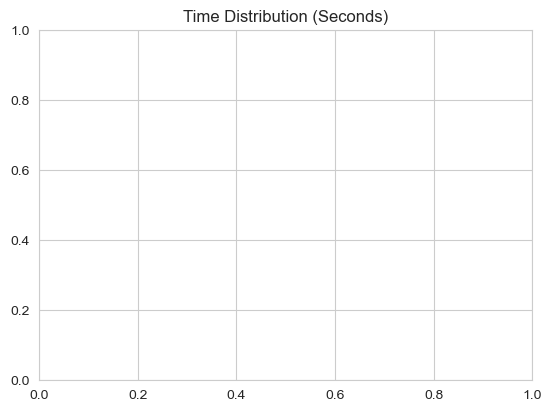

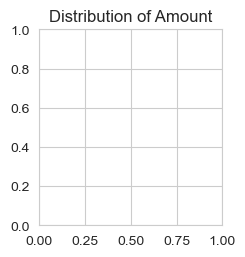

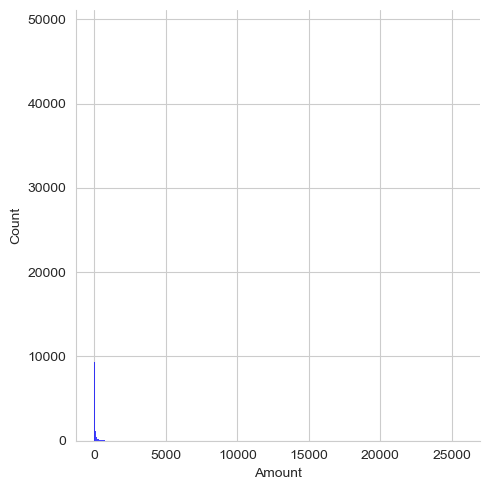

In [32]:
#Plot the time feature-

plt.figure(figsize=(14,10))
plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')
sns.displot(df['Time'], color='blue');

#Plot the amount feature-

plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.displot(df['Amount'],color='blue');

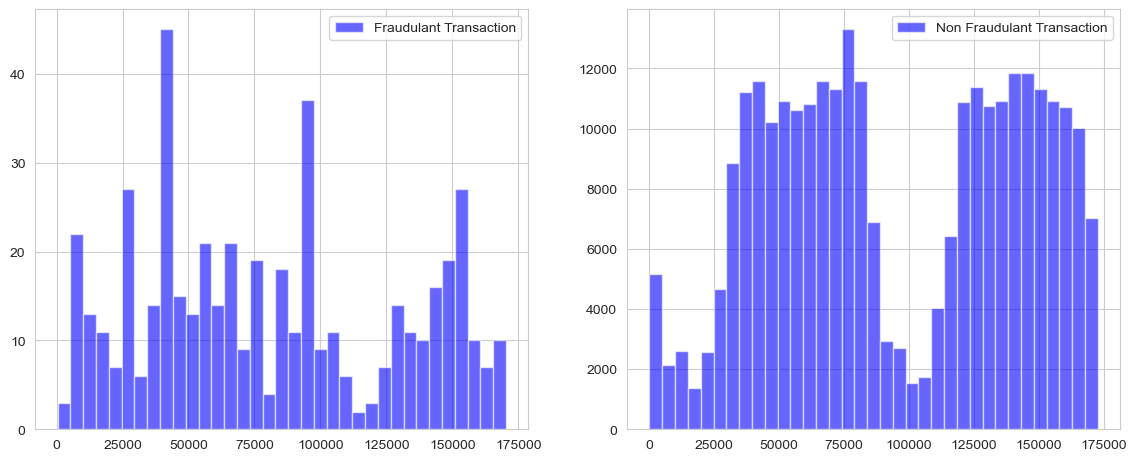

In [34]:
#Data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)-

plt.figure(figsize=(14, 12))
plt.subplot(2, 2, 1)
df[df.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
df[df.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

Doesn't seem like the time of transaction really matters here as per above observation. Now let us take a sample of the dataset for out modelling and prediction

## Data Pre-processing:

Time and Amount should be scaled as the other columns.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [38]:
X = df.drop('Class', axis=1)
y = df.Class

In [39]:
X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

In [40]:
X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

In [41]:
w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

In [42]:
print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [43]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

##  Artificial Neural Network (ANNs):

An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons.

In [46]:
from tensorflow import keras

In [47]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [48]:
METRICS = [

    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
    
]

In [49]:
model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

In [50]:
callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

In [51]:
r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
    callbacks=callbacks,
)

Epoch 1/300
78/78 [==============================] - 18s 145ms/step - loss: 0.8068 - fn: 54.0000 - fp: 73432.0000 - tn: 85772.0000 - tp: 233.0000 - precision: 0.0032 - recall: 0.8118 - val_loss: 0.5418 - val_fn: 13.0000 - val_fp: 56.0000 - val_tn: 39748.0000 - val_tp: 56.0000 - val_precision: 0.5000 - val_recall: 0.8116
Epoch 2/300
78/78 [==============================] - 9s 112ms/step - loss: 0.6891 - fn: 41.0000 - fp: 60858.0000 - tn: 98346.0000 - tp: 246.0000 - precision: 0.0040 - recall: 0.8571 - val_loss: 0.4979 - val_fn: 13.0000 - val_fp: 46.0000 - val_tn: 39758.0000 - val_tp: 56.0000 - val_precision: 0.5490 - val_recall: 0.8116
Epoch 3/300
78/78 [==============================] - 8s 105ms/step - loss: 0.6113 - fn: 39.0000 - fp: 48066.0000 - tn: 111138.0000 - tp: 248.0000 - precision: 0.0051 - recall: 0.8641 - val_loss: 0.4527 - val_fn: 13.0000 - val_fp: 32.0000 - val_tn: 39772.0000 - val_tp: 56.0000 - val_precision: 0.6364 - val_recall: 0.8116
Epoch 4/300
78/78 [================

78/78 [==============================] - 10s 127ms/step - loss: 0.0297 - fn: 96.0000 - fp: 117.0000 - tn: 159087.0000 - tp: 191.0000 - precision: 0.6201 - recall: 0.6655 - val_loss: 0.0237 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
Epoch 27/300
78/78 [==============================] - 10s 129ms/step - loss: 0.0277 - fn: 98.0000 - fp: 104.0000 - tn: 159100.0000 - tp: 189.0000 - precision: 0.6451 - recall: 0.6585 - val_loss: 0.0227 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
Epoch 28/300
78/78 [==============================] - 10s 122ms/step - loss: 0.0259 - fn: 93.0000 - fp: 101.0000 - tn: 159103.0000 - tp: 194.0000 - precision: 0.6576 - recall: 0.6760 - val_loss: 0.0211 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
Epoch 29/300
78/78 [===========================

Epoch 52/300
78/78 [==============================] - 9s 122ms/step - loss: 0.0116 - fn: 82.0000 - fp: 49.0000 - tn: 159155.0000 - tp: 205.0000 - precision: 0.8071 - recall: 0.7143 - val_loss: 0.0109 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
Epoch 53/300
78/78 [==============================] - 10s 124ms/step - loss: 0.0124 - fn: 88.0000 - fp: 52.0000 - tn: 159152.0000 - tp: 199.0000 - precision: 0.7928 - recall: 0.6934 - val_loss: 0.0093 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
Epoch 54/300
78/78 [==============================] - 9s 119ms/step - loss: 0.0101 - fn: 97.0000 - fp: 49.0000 - tn: 159155.0000 - tp: 190.0000 - precision: 0.7950 - recall: 0.6620 - val_loss: 0.0105 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
Epoch 55/300
78/78 [===================

Epoch 78/300
78/78 [==============================] - 11s 145ms/step - loss: 0.0055 - fn: 82.0000 - fp: 30.0000 - tn: 159174.0000 - tp: 205.0000 - precision: 0.8723 - recall: 0.7143 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
Epoch 79/300
78/78 [==============================] - 12s 148ms/step - loss: 0.0045 - fn: 83.0000 - fp: 25.0000 - tn: 159179.0000 - tp: 204.0000 - precision: 0.8908 - recall: 0.7108 - val_loss: 0.0048 - val_fn: 13.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 56.0000 - val_precision: 0.8485 - val_recall: 0.8116
Epoch 80/300
78/78 [==============================] - 12s 152ms/step - loss: 0.0048 - fn: 83.0000 - fp: 27.0000 - tn: 159177.0000 - tp: 204.0000 - precision: 0.8831 - recall: 0.7108 - val_loss: 0.0044 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
Epoch 81/300
78/78 [===================

Epoch 104/300
78/78 [==============================] - 13s 165ms/step - loss: 0.0033 - fn: 77.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 210.0000 - precision: 0.9211 - recall: 0.7317 - val_loss: 0.0043 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 105/300
78/78 [==============================] - 10s 133ms/step - loss: 0.0036 - fn: 76.0000 - fp: 27.0000 - tn: 159177.0000 - tp: 211.0000 - precision: 0.8866 - recall: 0.7352 - val_loss: 0.0044 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
Epoch 106/300
78/78 [==============================] - 9s 115ms/step - loss: 0.0038 - fn: 78.0000 - fp: 20.0000 - tn: 159184.0000 - tp: 209.0000 - precision: 0.9127 - recall: 0.7282 - val_loss: 0.0043 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
Epoch 107/300
78/78 [=================

78/78 [==============================] - 13s 168ms/step - loss: 0.0024 - fn: 66.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 221.0000 - precision: 0.9404 - recall: 0.7700 - val_loss: 0.0042 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
Epoch 130/300
78/78 [==============================] - 12s 149ms/step - loss: 0.0027 - fn: 61.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 226.0000 - precision: 0.9339 - recall: 0.7875 - val_loss: 0.0042 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
Epoch 131/300
78/78 [==============================] - 13s 164ms/step - loss: 0.0025 - fn: 63.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 224.0000 - precision: 0.9256 - recall: 0.7805 - val_loss: 0.0043 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
Epoch 132/300
78/78 [==============================

Epoch 155/300
78/78 [==============================] - 5s 64ms/step - loss: 0.0021 - fn: 58.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 229.0000 - precision: 0.9463 - recall: 0.7979 - val_loss: 0.0041 - val_fn: 16.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 53.0000 - val_precision: 0.8983 - val_recall: 0.7681
Epoch 156/300
78/78 [==============================] - 5s 67ms/step - loss: 0.0023 - fn: 64.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 223.0000 - precision: 0.9370 - recall: 0.7770 - val_loss: 0.0043 - val_fn: 16.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 53.0000 - val_precision: 0.8983 - val_recall: 0.7681
Epoch 157/300
78/78 [==============================] - 5s 66ms/step - loss: 0.0021 - fn: 55.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 232.0000 - precision: 0.9393 - recall: 0.8084 - val_loss: 0.0043 - val_fn: 16.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 53.0000 - val_precision: 0.8983 - val_recall: 0.7681
Epoch 158/300
78/78 [======================

Epoch 181/300
78/78 [==============================] - 5s 70ms/step - loss: 0.0018 - fn: 48.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 239.0000 - precision: 0.9484 - recall: 0.8328 - val_loss: 0.0044 - val_fn: 17.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 52.0000 - val_precision: 0.9123 - val_recall: 0.7536
Epoch 182/300
78/78 [==============================] - 5s 64ms/step - loss: 0.0016 - fn: 47.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 240.0000 - precision: 0.9677 - recall: 0.8362 - val_loss: 0.0043 - val_fn: 15.0000 - val_fp: 4.0000 - val_tn: 39800.0000 - val_tp: 54.0000 - val_precision: 0.9310 - val_recall: 0.7826
Epoch 183/300
78/78 [==============================] - 5s 66ms/step - loss: 0.0016 - fn: 46.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 241.0000 - precision: 0.9488 - recall: 0.8397 - val_loss: 0.0045 - val_fn: 16.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 53.0000 - val_precision: 0.8983 - val_recall: 0.7681
Epoch 184/300
78/78 [=======================

Epoch 207/300
78/78 [==============================] - 5s 70ms/step - loss: 0.0016 - fn: 46.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 241.0000 - precision: 0.9718 - recall: 0.8397 - val_loss: 0.0049 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
Epoch 208/300
78/78 [==============================] - 6s 76ms/step - loss: 0.0016 - fn: 45.0000 - fp: 17.0000 - tn: 159187.0000 - tp: 242.0000 - precision: 0.9344 - recall: 0.8432 - val_loss: 0.0049 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
Epoch 209/300
78/78 [==============================] - 6s 71ms/step - loss: 0.0014 - fn: 45.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 242.0000 - precision: 0.9490 - recall: 0.8432 - val_loss: 0.0049 - val_fn: 16.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 53.0000 - val_precision: 0.8983 - val_recall: 0.7681
Epoch 210/300
78/78 [=======================

Epoch 233/300
78/78 [==============================] - 6s 75ms/step - loss: 0.0013 - fn: 44.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 243.0000 - precision: 0.9455 - recall: 0.8467 - val_loss: 0.0051 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch 234/300
78/78 [==============================] - 8s 97ms/step - loss: 0.0012 - fn: 38.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 249.0000 - precision: 0.9614 - recall: 0.8676 - val_loss: 0.0051 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
Epoch 235/300
78/78 [==============================] - 10s 127ms/step - loss: 0.0011 - fn: 38.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 249.0000 - precision: 0.9468 - recall: 0.8676 - val_loss: 0.0051 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
Epoch 236/300
78/78 [====================

Epoch 259/300
78/78 [==============================] - 5s 67ms/step - loss: 0.0012 - fn: 34.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 253.0000 - precision: 0.9440 - recall: 0.8815 - val_loss: 0.0054 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
Epoch 260/300
78/78 [==============================] - 5s 68ms/step - loss: 0.0011 - fn: 39.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 248.0000 - precision: 0.9725 - recall: 0.8641 - val_loss: 0.0054 - val_fn: 14.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 55.0000 - val_precision: 0.9167 - val_recall: 0.7971
Epoch 261/300
78/78 [==============================] - 6s 75ms/step - loss: 9.2416e-04 - fn: 30.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 257.0000 - precision: 0.9698 - recall: 0.8955 - val_loss: 0.0054 - val_fn: 14.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 55.0000 - val_precision: 0.9167 - val_recall: 0.7971
Epoch 262/300
78/78 [====================

78/78 [==============================] - 8s 105ms/step - loss: 9.4207e-04 - fn: 33.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 254.0000 - precision: 0.9658 - recall: 0.8850 - val_loss: 0.0056 - val_fn: 16.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 53.0000 - val_precision: 0.9138 - val_recall: 0.7681
Epoch 285/300
78/78 [==============================] - 8s 100ms/step - loss: 8.8853e-04 - fn: 29.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 258.0000 - precision: 0.9591 - recall: 0.8990 - val_loss: 0.0056 - val_fn: 17.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 52.0000 - val_precision: 0.9123 - val_recall: 0.7536
Epoch 286/300
78/78 [==============================] - 6s 71ms/step - loss: 0.0010 - fn: 35.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 252.0000 - precision: 0.9509 - recall: 0.8780 - val_loss: 0.0056 - val_fn: 16.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 53.0000 - val_precision: 0.9138 - val_recall: 0.7681
Epoch 287/300
78/78 [===========================

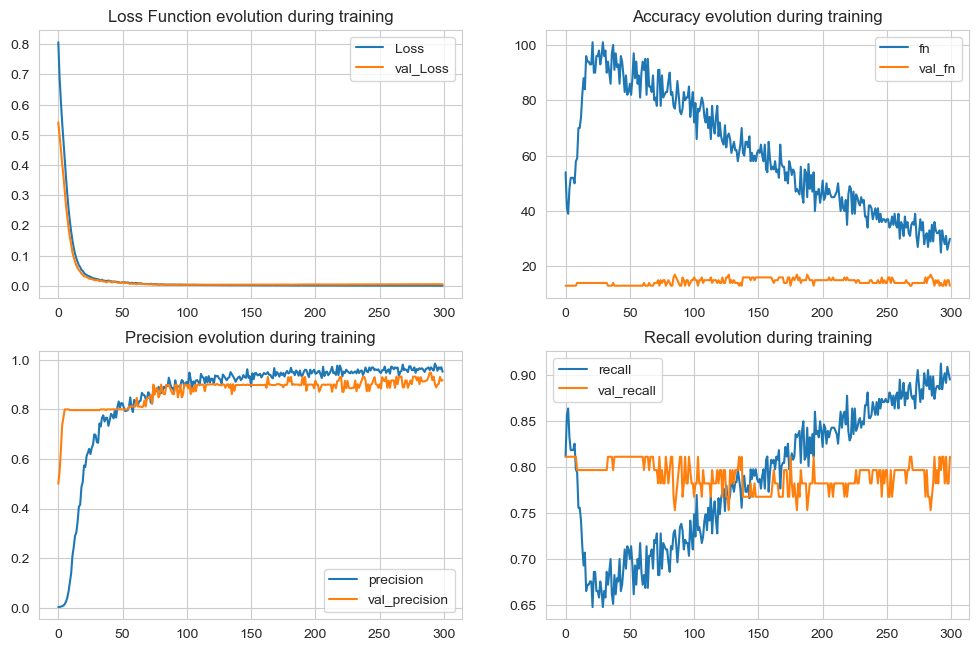

In [53]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [52]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

2671/2671 [==============================] - 12s 4ms/step
Train Result:
Accuracy Score: 99.99%
_______________________________________________
Classification Report:
                       0          1  accuracy      macro avg   weighted avg
precision       0.999912    1.00000  0.999912       0.999956       0.999912
recall          1.000000    0.95122  0.999912       0.975610       0.999912
f1-score        0.999956    0.97500  0.999912       0.987478       0.999911
support    159204.000000  287.00000  0.999912  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [    14    273]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999684    0.915966  0.999567      0.957825      0.999550
recall         0.999883    0.801471  0.999567      0.900677      0.999567
f1-score       0.9997

## XGBoost:

XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

In [54]:
from xgboost import XGBClassifier

In [55]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [56]:
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

In [57]:
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    159204.0  287.0       1.0   159491.0      159491.0
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999707    0.948718  0.999637      0.974212      0.999626
recall         0.999930    0.816176  0.999637      0.908053      0.999637
f1-score       0.999818    0.877470  0.999637      0.938644      0.999624
support    85307.000000  136.000000  0.999637  85443.000000  85443.000000


##  Random Forest:

Random forest is a commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

In [61]:
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    159204.0  287.0       1.0   159491.0      159491.0
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999684    0.915966  0.999567      0.957825      0.999550
recall         0.999883    0.801471  0.999567      0.900677      0.999567
f1-score       0.999783    0.854902  0.999567      0.927343      0.999553
support    85307.000000  136.000000  0.999567  85443.000000  85443.000000


## CatBoost:

CatBoost is a supervised machine learning method that is used by the Train Using AutoML tool and uses decision trees for classification and regression. As its name suggests, CatBoost has two main features, it works with categorical data (the Cat) and it uses gradient boosting (the Boost).

In [62]:
from catboost import CatBoostClassifier

In [63]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)

Learning rate set to 0.089847
0:	learn: 0.3914637	total: 251ms	remaining: 4m 10s
1:	learn: 0.2368418	total: 295ms	remaining: 2m 27s
2:	learn: 0.1341780	total: 344ms	remaining: 1m 54s
3:	learn: 0.0788514	total: 390ms	remaining: 1m 37s
4:	learn: 0.0482949	total: 437ms	remaining: 1m 26s
5:	learn: 0.0315326	total: 490ms	remaining: 1m 21s
6:	learn: 0.0213628	total: 539ms	remaining: 1m 16s
7:	learn: 0.0153604	total: 600ms	remaining: 1m 14s
8:	learn: 0.0115137	total: 655ms	remaining: 1m 12s
9:	learn: 0.0090128	total: 709ms	remaining: 1m 10s
10:	learn: 0.0071550	total: 767ms	remaining: 1m 8s
11:	learn: 0.0060638	total: 814ms	remaining: 1m 6s
12:	learn: 0.0052453	total: 861ms	remaining: 1m 5s
13:	learn: 0.0046542	total: 907ms	remaining: 1m 3s
14:	learn: 0.0042229	total: 951ms	remaining: 1m 2s
15:	learn: 0.0038780	total: 1s	remaining: 1m 1s
16:	learn: 0.0036112	total: 1.04s	remaining: 1m
17:	learn: 0.0034152	total: 1.09s	remaining: 59.5s
18:	learn: 0.0032511	total: 1.14s	remaining: 58.7s
19:	lea

161:	learn: 0.0012291	total: 8.45s	remaining: 43.7s
162:	learn: 0.0012280	total: 8.5s	remaining: 43.6s
163:	learn: 0.0012266	total: 8.54s	remaining: 43.5s
164:	learn: 0.0012199	total: 8.59s	remaining: 43.5s
165:	learn: 0.0012135	total: 8.63s	remaining: 43.4s
166:	learn: 0.0012109	total: 8.67s	remaining: 43.3s
167:	learn: 0.0012013	total: 8.72s	remaining: 43.2s
168:	learn: 0.0011997	total: 8.77s	remaining: 43.1s
169:	learn: 0.0011975	total: 8.82s	remaining: 43.1s
170:	learn: 0.0011950	total: 8.87s	remaining: 43s
171:	learn: 0.0011937	total: 8.92s	remaining: 42.9s
172:	learn: 0.0011858	total: 8.97s	remaining: 42.9s
173:	learn: 0.0011818	total: 9.02s	remaining: 42.8s
174:	learn: 0.0011801	total: 9.06s	remaining: 42.7s
175:	learn: 0.0011772	total: 9.11s	remaining: 42.6s
176:	learn: 0.0011728	total: 9.16s	remaining: 42.6s
177:	learn: 0.0011700	total: 9.21s	remaining: 42.5s
178:	learn: 0.0011608	total: 9.25s	remaining: 42.4s
179:	learn: 0.0011524	total: 9.3s	remaining: 42.4s
180:	learn: 0.00

321:	learn: 0.0007616	total: 21.8s	remaining: 46s
322:	learn: 0.0007583	total: 21.9s	remaining: 46s
323:	learn: 0.0007535	total: 22s	remaining: 46s
324:	learn: 0.0007525	total: 22.1s	remaining: 46s
325:	learn: 0.0007492	total: 22.2s	remaining: 46s
326:	learn: 0.0007479	total: 22.4s	remaining: 46s
327:	learn: 0.0007457	total: 22.5s	remaining: 46s
328:	learn: 0.0007442	total: 22.6s	remaining: 46s
329:	learn: 0.0007434	total: 22.7s	remaining: 46s
330:	learn: 0.0007414	total: 22.8s	remaining: 46s
331:	learn: 0.0007400	total: 22.9s	remaining: 46s
332:	learn: 0.0007381	total: 22.9s	remaining: 46s
333:	learn: 0.0007363	total: 23.1s	remaining: 46s
334:	learn: 0.0007345	total: 23.2s	remaining: 46s
335:	learn: 0.0007334	total: 23.2s	remaining: 45.9s
336:	learn: 0.0007317	total: 23.3s	remaining: 45.9s
337:	learn: 0.0007300	total: 23.4s	remaining: 45.9s
338:	learn: 0.0007283	total: 23.5s	remaining: 45.8s
339:	learn: 0.0007252	total: 23.6s	remaining: 45.9s
340:	learn: 0.0007233	total: 23.7s	remaini

482:	learn: 0.0004466	total: 32.4s	remaining: 34.7s
483:	learn: 0.0004459	total: 32.5s	remaining: 34.6s
484:	learn: 0.0004454	total: 32.5s	remaining: 34.5s
485:	learn: 0.0004421	total: 32.5s	remaining: 34.4s
486:	learn: 0.0004407	total: 32.6s	remaining: 34.3s
487:	learn: 0.0004385	total: 32.6s	remaining: 34.2s
488:	learn: 0.0004378	total: 32.7s	remaining: 34.2s
489:	learn: 0.0004375	total: 32.7s	remaining: 34.1s
490:	learn: 0.0004369	total: 32.8s	remaining: 34s
491:	learn: 0.0004359	total: 32.8s	remaining: 33.9s
492:	learn: 0.0004352	total: 32.9s	remaining: 33.8s
493:	learn: 0.0004333	total: 32.9s	remaining: 33.7s
494:	learn: 0.0004322	total: 33s	remaining: 33.6s
495:	learn: 0.0004305	total: 33s	remaining: 33.5s
496:	learn: 0.0004299	total: 33s	remaining: 33.4s
497:	learn: 0.0004268	total: 33.1s	remaining: 33.4s
498:	learn: 0.0004259	total: 33.1s	remaining: 33.3s
499:	learn: 0.0004204	total: 33.2s	remaining: 33.2s
500:	learn: 0.0004202	total: 33.3s	remaining: 33.1s
501:	learn: 0.000419

642:	learn: 0.0002745	total: 40s	remaining: 22.2s
643:	learn: 0.0002744	total: 40s	remaining: 22.1s
644:	learn: 0.0002731	total: 40.1s	remaining: 22.1s
645:	learn: 0.0002730	total: 40.1s	remaining: 22s
646:	learn: 0.0002720	total: 40.2s	remaining: 21.9s
647:	learn: 0.0002718	total: 40.2s	remaining: 21.9s
648:	learn: 0.0002705	total: 40.3s	remaining: 21.8s
649:	learn: 0.0002695	total: 40.3s	remaining: 21.7s
650:	learn: 0.0002694	total: 40.4s	remaining: 21.6s
651:	learn: 0.0002688	total: 40.4s	remaining: 21.6s
652:	learn: 0.0002658	total: 40.5s	remaining: 21.5s
653:	learn: 0.0002655	total: 40.5s	remaining: 21.4s
654:	learn: 0.0002652	total: 40.5s	remaining: 21.4s
655:	learn: 0.0002649	total: 40.6s	remaining: 21.3s
656:	learn: 0.0002645	total: 40.6s	remaining: 21.2s
657:	learn: 0.0002644	total: 40.7s	remaining: 21.1s
658:	learn: 0.0002642	total: 40.7s	remaining: 21.1s
659:	learn: 0.0002634	total: 40.7s	remaining: 21s
660:	learn: 0.0002630	total: 40.8s	remaining: 20.9s
661:	learn: 0.000262

803:	learn: 0.0001755	total: 46.8s	remaining: 11.4s
804:	learn: 0.0001754	total: 46.9s	remaining: 11.4s
805:	learn: 0.0001751	total: 46.9s	remaining: 11.3s
806:	learn: 0.0001746	total: 47s	remaining: 11.2s
807:	learn: 0.0001745	total: 47s	remaining: 11.2s
808:	learn: 0.0001744	total: 47.1s	remaining: 11.1s
809:	learn: 0.0001744	total: 47.1s	remaining: 11.1s
810:	learn: 0.0001743	total: 47.2s	remaining: 11s
811:	learn: 0.0001742	total: 47.2s	remaining: 10.9s
812:	learn: 0.0001736	total: 47.3s	remaining: 10.9s
813:	learn: 0.0001731	total: 47.3s	remaining: 10.8s
814:	learn: 0.0001726	total: 47.3s	remaining: 10.7s
815:	learn: 0.0001724	total: 47.4s	remaining: 10.7s
816:	learn: 0.0001722	total: 47.5s	remaining: 10.6s
817:	learn: 0.0001721	total: 47.5s	remaining: 10.6s
818:	learn: 0.0001714	total: 47.6s	remaining: 10.5s
819:	learn: 0.0001714	total: 47.6s	remaining: 10.4s
820:	learn: 0.0001710	total: 47.7s	remaining: 10.4s
821:	learn: 0.0001708	total: 47.7s	remaining: 10.3s
822:	learn: 0.0001

964:	learn: 0.0001314	total: 54.9s	remaining: 1.99s
965:	learn: 0.0001313	total: 55s	remaining: 1.94s
966:	learn: 0.0001312	total: 55s	remaining: 1.88s
967:	learn: 0.0001310	total: 55.1s	remaining: 1.82s
968:	learn: 0.0001310	total: 55.1s	remaining: 1.76s
969:	learn: 0.0001306	total: 55.2s	remaining: 1.71s
970:	learn: 0.0001297	total: 55.2s	remaining: 1.65s
971:	learn: 0.0001296	total: 55.3s	remaining: 1.59s
972:	learn: 0.0001295	total: 55.3s	remaining: 1.53s
973:	learn: 0.0001295	total: 55.4s	remaining: 1.48s
974:	learn: 0.0001293	total: 55.4s	remaining: 1.42s
975:	learn: 0.0001290	total: 55.5s	remaining: 1.36s
976:	learn: 0.0001284	total: 55.5s	remaining: 1.31s
977:	learn: 0.0001283	total: 55.6s	remaining: 1.25s
978:	learn: 0.0001282	total: 55.6s	remaining: 1.19s
979:	learn: 0.0001278	total: 55.7s	remaining: 1.14s
980:	learn: 0.0001276	total: 55.7s	remaining: 1.08s
981:	learn: 0.0001273	total: 55.8s	remaining: 1.02s
982:	learn: 0.0001271	total: 55.8s	remaining: 966ms
983:	learn: 0.00

In [64]:
y_train_pred = cb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

In [65]:
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999994    1.000000  0.999994       0.999997       0.999994
recall          1.000000    0.996516  0.999994       0.998258       0.999994
f1-score        0.999997    0.998255  0.999994       0.999126       0.999994
support    159204.000000  287.000000  0.999994  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     1    286]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999707    0.932773  0.999614      0.966240      0.999600
recall         0.999906    0.816176  0.999614      0.908041      0.999614
f1-score       0.999807    0.870588  0.999614      0.935197      0.999601

## LigthGBM:

LightGBM is a gradient boosting ensemble method that is used by the Train Using AutoML tool and is based on decision trees. As with other decision tree-based methods, LightGBM can be used for both classification and regression. LightGBM is optimized for high performance with distributed systems.

In [67]:
from lightgbm import LGBMClassifier

In [68]:
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)

LGBMClassifier()

In [69]:
y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

In [70]:
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['LigthGBM'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.58%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999250    0.233333  0.995793       0.616292       0.997872
recall          0.996533    0.585366  0.995793       0.790949       0.995793
f1-score        0.997890    0.333664  0.995793       0.665777       0.996695
support    159204.000000  287.000000  0.995793  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[158652    552]
 [   119    168]]

Test Result:
Accuracy Score: 99.50%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999247    0.164760  0.994979      0.582003      0.997919
recall         0.995721    0.529412  0.994979      0.762567      0.994979
f1-score       0.997481    0.251309  0.994979      0.624395      0.996293


##  Model Comparaison:

<Axes: >

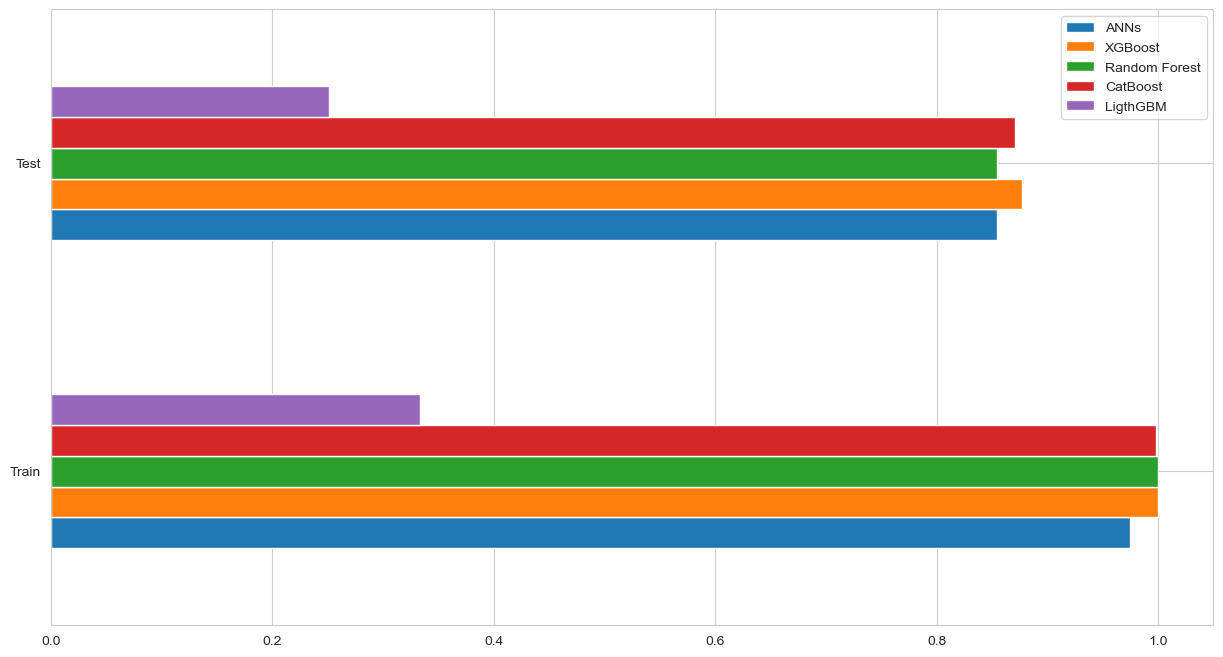

In [71]:
scores_df = pd.DataFrame(scores_dict)
scores_df.plot(kind='barh', figsize=(15, 8))

### Conclusions:
We learned how to develop our credit card fraud detection model using machine learning. We used a variety of ML algorithms, including ANNs and Tree-based models. At the end of the training, out of 85443 validation transaction, XGBoost performs better than other models:

- Correctly identifying 111 of them as fraudulent
- Missing 9 fraudulent transactions
- At the cost of incorrectly flagging 25 legitimate transactions